In [1]:
!pip install spectral-cube
!pip install pvextractor 

import matplotlib.pyplot as plt
import numpy as np
from scipy import*
import scipy.ndimage as nd
import matplotlib 
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats
#import aplpy
from matplotlib import*
from astropy.convolution import Kernel1D
#from astropy.convolution import Box1DKernela
from astropy import units as u
from astropy.io import fits
from spectral_cube import SpectralCube
from spectral_cube import* # SpectralCube 
from spectral_cube import Projection 
import scipy.ndimage as nd
from pvextractor import extract_pv_slice
from pvextractor import Path
from scipy import optimize

from sympy import nsolve
from scipy.optimize import fsolve 
from scipy.constants import*
from astropy import constants as con
from astropy import units as u
#import matplotlib.mlab as mlab
from astropy.convolution import Kernel1D
from astropy.table import Table
from astropy.wcs import WCS
from astropy.wcs import utils 
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.table import QTable
#from yt.mods import ColorTransferFunction, write_bitmap
#from astropy import yt
import warnings
from astropy.io import fits
import pandas as pd
import seaborn as sns
from astropy.table import vstack, hstack, join

from astropy import units as u
from astropy.visualization.wcsaxes import Quadrangle

# Import DataSci packages and classes >>>>>>>>>>>>>>>>>>

import pandas as pd
import numpy as np

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# This is new, it will allow us to interact with
# 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor as gbreg 

     |████████████████████████████████| 218 kB 13.3 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 73 kB 982 kB/s 


In [2]:
#############################################################################################################
## >>>>>>>>>>>>>>>>> Alternative way of uploading and reading files >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#############################################################################################################
from google.colab import drive
drive.mount('/content/gdrive')

filepath = '/content/gdrive/MyDrive/0.Work/RESEARCH_INFO/Research_2021/PilotSurvey_Newfields//Large-sample-outflows-in-CygX-and-ML-methods/'
#filepath = "C:\\Users\\Uber-PC\\Google Drive\\0.Work\\CourseworkStudyMaterial\\Data_Science\\Fall2021\\Erdos_GitHub\\fall-2021\\python prep\\Practice Problems\\" # <<<< this only works with Jupyter Notebook 
           #"C:\Users\Uber-PC\Google Drive\0.Work\CourseworkStudyMaterial\Data_Science\Fall2021\Erdos_GitHub\fall-2021\python prep\Practice Problems\random_walk.csv"

##########################################################################################################################
kryu_list = Table.read(filepath + 'asu (1).fit') # original Kryukova survey 
proto = Table.read(filepath + 'cygx_pilot_protostars(Kry).fit')
wu = Table.read(filepath + 'WuTable.fit')
outflowsCloud = Table.read(filepath + 'outflowsClouds_output.fit')


cygx_mom0 = SpectralCube.read(filepath + 'cygx_mom0.fits')

# read the kryukova list 
#stars_kry = Table.read('asu (1).fit') 

# read coordinates tables 
of_newfields = Table.read(filepath + 'table_newfields_input.fit')
of_cygrift = Table.read(filepath + 'cygX_pilot_cygrift0.65kpc_outout.fit')
of_W75 = Table.read(filepath + 'cygX_pilot_W75_outout.fit')
of_DR21 = Table.read(filepath + 'cygX_pilot_DR21_outout.fit')

cygX_newfields = SpectralCube.read(filepath + 'cygx_cobig_small.fits')
cygX_pilot = SpectralCube.read(filepath +'cygX_pilot_km.fits')
cygX_init_newfields = QTable.read(filepath+'table_newfields_input.fit')
cygX_init_pilot_1_5kpcA =  QTable.read(filepath + 'cygX_pilot_1.5kpc_A_input.fit')
pilotL = Table.read(filepath + 'cygxPilot_proto.fits')

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


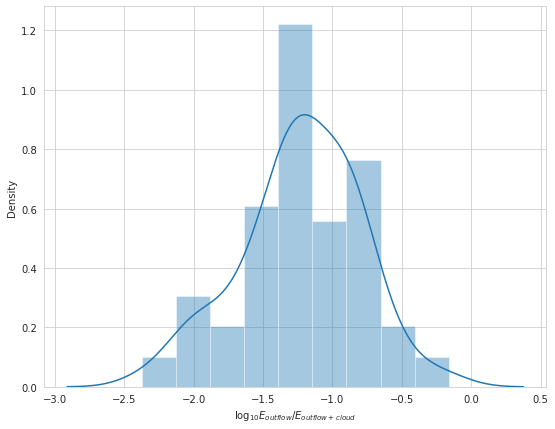

In [5]:

##########################################################################################################################
#>>>>>>> this generates file required for finding protostellar association with Kryukova

pilotL_df = pilotL.to_pandas().round({'RAJ2000':3,	'DecJ2000':3,	'Distance':2,	'Vc':1,'Mass':2, 'Momentum':2,	'Energy':2,	'Dynamical Time':1, 'RA_proto':3,	'Dec_proto':3,	'logL_proto':1,	'alpha_proto':1})
of_newfields_df = of_newfields.to_pandas().round({'RAJ2000':3,	'DecJ2000':3, 'Distance':2,	'Vc':1,'Mass':2})[['ID','RAJ2000','DecJ2000',	'Vc',	'Distance']]


outflowsCloud_df = outflowsCloud.to_pandas().round({'RAJ2000':3,	'DecJ2000':3,	'Distance':2,	'Vc':1,'Mass':2, 'Momentum':2,	'Energy':2,	'Dynamical Time':1}).sort_values('RAJ2000').reset_index()
cygx_all = pd.merge(pilotL_df, of_newfields_df, how='outer').sort_values('RAJ2000').reset_index()

outflowsCloud_df_refined = outflowsCloud_df[['ID','RAJ2000', 'DecJ2000', 'Mass', 'Momentum', 'Energy','Dynamical Time', 'Cloud_Mass', 'Cloud_Energy', 'Energy_(of/cloud+of)']]
cygx_all_refined = cygx_all[['ID', 'RAJ2000', 'DecJ2000', 'Distance', 'Vc']]

cygx_combined_out = pd.merge(cygx_all_refined, outflowsCloud_df_refined, on=['RAJ2000','DecJ2000'], how='outer').sort_values('RAJ2000').drop('ID_y', axis=1).rename({'ID_x':'ID'}, axis=1)
#cygx_combined_out.to_csv(filepath + 'cygx_combined_out.csv') # this file is manually modeified for NaN values/repeated cells. Read this from filepath then run 



In [ ]:
cygx_combined_out = pd.read_csv(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})


cygx_combined_out = pd.read_csv(filepath + 'cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})
cygx_combined_out = cygx_combined_out[cygx_combined_out['Energy_(of/cloud+of)']>0]
cygx_combined_out['log10_Energy_(of/cloud+of)'] = np.log10(cygx_combined_out['Energy_(of/cloud+of)'])

plt.figure(figsize=(9,7))
sns.distplot(cygx_combined_out['log10_Energy_(of/cloud+of)'], axlabel='log$_{10}E_{outflow}/E_{outflow+cloud}$')
#sns.histplot(outflowsCloud_df1['log10_Energy_(of/cloud+of)'])

#plt.savefig('outflow+cloud_hist.pdf')
plt.show()
#plt.close()

In [14]:
##########################################################################################################################
### Development of clustering algorithm for outflow-protostar associaton (non ML)

#outflows = QTable.read('CygX_pilot.fit')
protostars = QTable.read(filepath + 'asu (1).fit')

df_outflows =  pd.read_csv(filepath + 'cygx_combined_out.csv').drop('Unnamed: 0', axis=1).round({'RAJ2000':3, 'DecJ2000':3})
df_proto = protostars.to_pandas().round({'RAJ2000':3, 'DEJ2000':3})
t =QTable(names=('ID','RAJ2000' ,'DecJ2000', 'RA_proto', 'Dec_proto', 'Dist_proto', 'logL_proto', 'alpha_proto'), dtype=('U16', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8'))
df_t = t.to_pandas()
D = ((np.max(df_outflows['RAJ2000']) - np.min(df_outflows['RAJ2000']))**2 + (np.max(df_outflows['DecJ2000']) - np.min(df_outflows['DecJ2000']))**2)**0.5
D = (D*u.deg).to(u.arcsecond)
Dist0 = D
for i in range(len(df_outflows)):
  xo = df_outflows['RAJ2000'][i]
  yo = df_outflows['DecJ2000'][i]
  for j in range(len(df_proto)):
    xp = df_proto['RAJ2000'][j]
    yp = df_proto['DEJ2000'][j]
    dist = ((((xo - xp)**2 + (yo - yp)**2)**(0.5))*u.deg).to(u.arcsecond)
    if dist <= Dist0: # find a large radius # if current dist is less than the previous dist, select this object as the nearest protostar
      x_proto = xp
      y_proto = yp
      logL = df_proto['logL'][j]
      alpha = df_proto['alpha'][j]
      #print(logL)
      Dist0 = dist # and update previous dist by the current one. This will loop through the list of Kryukova protostars 
      #print(Dist0)
    else:
      pass
  t.add_row([df_outflows.copy()['ID'][i],df_outflows['RAJ2000'][i], df_outflows['DecJ2000'][i], x_proto, y_proto, Dist0 ,logL, alpha]) # this is similar to concatenating to pandas dataFrame, but we use astropy table instead
  Dist0 = D

t['RA_proto'].unit = u.deg
t['Dec_proto'].unit = u.deg
t['logL_proto'].unit = u.solLum
t['Dist_proto'].unit = u.arcsecond 
t.write(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_complete_list_protostars(Kry).fit', overwrite=True)


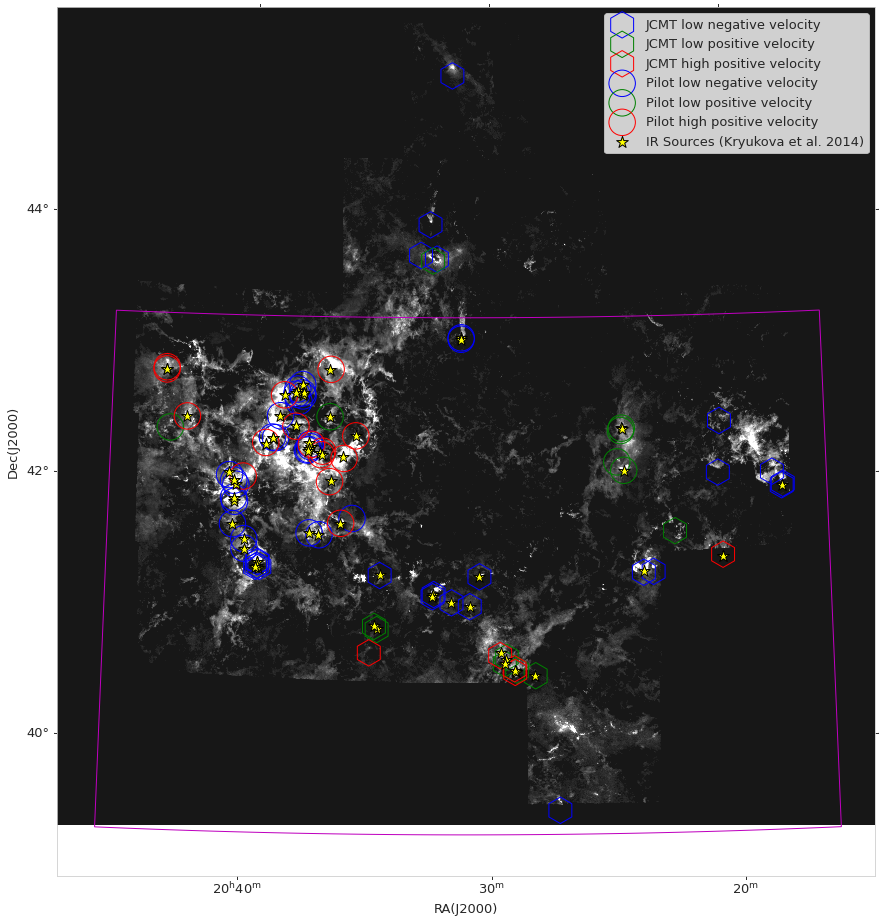

In [17]:
#################################################################################################################
###############################      CREATE COMBINED MAP       ##################################################
#################################################################################################################
## >>>>>>>>>>>>>>>> All the required tables and file are loaded in the read cell with filepath >>>>>

matplotlib.rcParams.update({'font.size': 13})

cygxmom0 = cygx_mom0.moment(order=0, axis=0)

of_newfields_highp = of_newfields[of_newfields['Vc']>7.5*u.km/u.s]
of_newfields_lowp = of_newfields[(of_newfields['Vc']<7.5*u.km/u.s) & (of_newfields['Vc']>=0*u.km/u.s)]
of_newfields_lown = of_newfields[of_newfields['Vc']<0*u.km/u.s]

# combined field (pilot+newfields) protostars from Kryukova catalogue 
proto = QTable.read(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_complete_list_protostars(Kry).fit')
proto_df = proto.to_pandas() 
proto[proto['Dist_proto'] < 100*u.arcsec].write(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_complete_list_protostars(Kry)_arcmin.fit', overwrite=True)

fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(1,1,1, projection=cygxmom0.wcs)
im=ax.imshow((cygxmom0).value,interpolation='nearest',label='$^{12}CO$',origin='lower', cmap='gray',vmin=-5,vmax=50)
ax.set_ylabel("Dec(J2000)")
ax.set_xlabel("RA(J2000)")
ax.grid(color='white', alpha=1, ls='solid')

#clb=plt.colorbar(im)
#clb.set_label('$^{12}$CO Integrated Intensity (K km s$^{-1}$)', labelpad=5, y=.5, rotation=90)

#ax.scatter(stars_kry['RAJ2000'].data, stars_kry['DEJ2000'].data,transform=ax.get_transform('world'), marker='*',s=200,edgecolor='black',facecolor='yellow')
# this works fine. Just disabled for now. Will use similar list for outflows 
size = 700
#ax.scatter(of_newfields['RAJ2000'].data, of_newfields['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=700,edgecolor='green',facecolor='none',label='JCMT-Newfields')
ax.scatter(of_newfields_lown['RAJ2000'].data, of_newfields_lown['DecJ2000'].data,transform=ax.get_transform('world'), marker='h',s=size,edgecolor='blue',facecolor='none',label='JCMT low negative velocity')
ax.scatter(of_newfields_lowp['RAJ2000'].data, of_newfields_lowp['DecJ2000'].data,transform=ax.get_transform('world'), marker='h',s=size,edgecolor='green',facecolor='none',label='JCMT low positive velocity')
ax.scatter(of_newfields_highp['RAJ2000'].data, of_newfields_highp['DecJ2000'].data,transform=ax.get_transform('world'), marker='h',s=size,edgecolor='red',facecolor='none',label='JCMT high positive velocity')


ax.scatter(of_DR21['RAJ2000'].data, of_DR21['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=size,edgecolor='blue',facecolor='none',label='Pilot low negative velocity')
ax.scatter(of_cygrift['RAJ2000'].data, of_cygrift['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=size,edgecolor='green',facecolor='none',label='Pilot low positive velocity')
ax.scatter(of_W75['RAJ2000'].data, of_W75['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=size,edgecolor='red',facecolor='none',label='Pilot high positive velocity')
#ax.scatter(proto['RA_proto'], proto['Dec_proto'],transform=ax.get_transform('world'), marker='*',s=150,edgecolor='black',facecolor='yellow',label='IR Sources (Kryukova et al. 2014)') 
ax.scatter(proto[proto['Dist_proto'] < 100*u.arcsec]['RA_proto'], proto[proto['Dist_proto'] < 100*u.arcsec]['Dec_proto'],transform=ax.get_transform('world'), marker='*',s=150,edgecolor='black',facecolor='yellow',label='IR Sources (Kryukova et al. 2014)') 

# show a rectangle indicating the Kryukova survey range >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
_, b, _ = cygx_mom0.world[0, :, 0]  #extract latitude world coordinates from cube
b, _ = cygxmom0.world[:, 0] 
_, _, l = cygx_mom0.world[0, 0, :]  #extract longitude world coordinates from cub

length = max(kryu_list['RAJ2000']) - min(kryu_list['RAJ2000'])
# we use b.min instead of min declination in Kryukova list because Kry list expands far beyond out dataset, which is unnecessary to include 
width = max(kryu_list['DEJ2000']) - b.min().value 

#r = Quadrangle((max(proto['RA_proto']),min(proto['Dec_proto']))*u.deg, -3*u.deg, 2*u.deg,edgecolor='white', facecolor='none',transform=ax.get_transform('fk5')) 

# >>> the location is the top left of Kry survey range, -length because RA is measured right to left, -width because we expand the rectangle downward from top >>>>>>>
r = Quadrangle((max(kryu_list['RAJ2000']), max(kryu_list['DEJ2000']))*u.deg, -length*u.deg, -width*u.deg,edgecolor='m', facecolor='none',transform=ax.get_transform('fk5'))
ax.add_patch(r)


plt.legend()

plt.savefig(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/output/mom0+outflows_arcmin.pdf',format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
plt.show()
plt.close()

In [21]:
##########################################################################################################################


#>>>>>> Run this for outflow lists w/ and w/o protostars 

proto_arcmin = QTable.read(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_complete_list_protostars(Kry)_arcmin.fit')
proto_arcmin.to_pandas().round({'RAJ2000':3,	'DecJ2000':3,	'RA_proto':3,	'Dec_proto':3,	'Dist_proto':0,	'logL_proto':1,	'alpha_proto':1}).to_csv(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/proto_arcmin.csv')
cygx_combined_out = pd.read_csv(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})
#####################################
proto_arcmin = pd.read_csv(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/proto_arcmin.csv').round({'RAJ2000':3, 'DecJ2000':3})


cygx_ofs_with_LIR = pd.merge(cygx_combined_out, proto_arcmin,on=['RAJ2000','DecJ2000'], how='inner')#.drop({'Unnamed: 0','ID_y'}, axis=1).rename({'ID_x':'ID'}, axis=1)

cygx_ofs_with_LIR.to_csv(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_ofs_with_LIR.csv')

ra_with_LIR = cygx_ofs_with_LIR['RAJ2000']
dec_with_LIR =  cygx_ofs_with_LIR['DecJ2000']

cygx_ofs_without_LIR = cygx_combined_out[~((cygx_combined_out['RAJ2000'].isin(ra_with_LIR)) & (cygx_combined_out['DecJ2000'].isin(dec_with_LIR)))]
cygx_ofs_without_LIR.to_csv(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_ofs_without_LIR.csv')

In [ ]:

####################################################################################################################
##########################                                             #############################################
##########################          WU COMPARISON SCATTER PLOTS        #############################################
##########################                                             #############################################
####################################################################################################################
#outflows = Table.read('cygxPilot_proto.fits')
outflows = outflowsCloud
mass_p= outflows['Mass']
dynTime_p = outflows['Dynamical Time']
energy_p = outflows['Energy']
energy_p2 = energy_p*1e44


table_wu = wu 
mass_wu=table_wu['Mass']
dynTime_wu = table_wu['t']
energy_wu = table_wu['E'] #remove rows with mass=0
energy_wu = (energy_wu).to(u.erg)

#gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

#ax1 = fig.add_subplot(gs[0,0])
enlog = np.log10(energy_wu.value[energy_wu.value>1e40])
mlog = np.log10(mass_wu[energy_wu.value>1e40])

energy_p1 = np.array([energy_p])*1e44
mass_p1 = np.array([mass_p])

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(14,12),constrained_layout=False)
plt.loglog(energy_wu, mass_wu,'ks',color='black', markerfacecolor='none', markeredgecolor='black',zorder=0, label='Wu et al. 2014')
plt.loglog(energy_p2, mass_p,'r^', markeredgecolor='white', markersize=11, zorder=0, label='JCMT')
plt.xlabel('Energy (erg)')
plt.ylabel('Mass (M$_{\odot}$)')
#plt.axes().set_aspect(aspect=1.0)
#plt.xlim(left=1e40)
plt.legend(loc='upper left')

plt.savefig('Wu-Pilot.pdf',format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
plt.show()
plt.close()

print('=========================+++++++++++++++++++++++++++++++++++++=========++++++++++++++++====================')
plt.figure(figsize=(14,12),constrained_layout=False)
plt.loglog(dynTime_p, energy_p2,'r^', markeredgecolor='white',markersize=8, label='JCMT outflows')
plt.loglog(dynTime_wu, energy_wu, 'ks', markerfacecolor='none', markeredgecolor='black', zorder=0,markersize=8, label='Wu et al. 2014')
plt.ylabel('Energy (erg)')
plt.xlabel('T$_{dyn}$ (10 kyr)')
plt.legend(loc='upper left')
plt.savefig('Wu-Pilot_dynT.pdf',format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
plt.show()
plt.close()
